In [1]:
import numpy as np
import matplotlib.pyplot as plt
from steepestdescent_line import steepestdescent_line_method
from poisson_matrix import poisson_matrix

In [2]:
def cgm_method(A, b, x0):
    """
    Conjugate Gradient Method to solve Ax=b or minimize 0.5 x^T A x - b^T x
    
    Inputs:
    A: the system matrix or the Hessian
    b: the RHS of the linear system or the gradient vector
    x0: initial guess
    
    Outputs:
    x: the solution (if converged)
    stat: a dictionary containing convergence info, iteration number, iterates, and residuals
    """
    # Convert x0 to a numpy array for consistency
    x = np.array(x0, ndmin=1)
    is_scalar = x.size == 1

    # Solver settings and info
    maxit = 100
    tol = 1e-6

    # Initial iteration
    stat = {"converged": False, "iter": 0, "X": [x.copy()], "resd": []}
    it = 0
    r = b - np.dot(A, x)
    p = r
    norm_r = np.linalg.norm(r)
    converged = (norm_r <= tol)

    # Store data for plotting
    stat["resd"].append(norm_r)
    
    # Main loop of CG
    while not converged and it < maxit:
        it += 1

        # TODO -- implement main loop of CG method
        # =======================================
        norm_r_prev = norm_r

        alpha = norm_r_prev**2 / np.dot(np.dot(p.T, A), p)
        x = x + alpha*p
        r = r - alpha*np.dot(A,p)
        norm_r = np.linalg.norm(r)
        beta = norm_r**2 / norm_r_prev**2
        p = r + beta*p

        # =======================================

        # Set the stopping rule
        converged = (norm_r <= tol)

        # Store data for plotting
        stat["X"].append(np.copy(x))
        stat["resd"].append(norm_r)

    stat['iter'] = it
    # Prepare return data
    if not converged:
        stat['converged'] = converged
        return None, stat
    stat['converged'] = converged
    # Convert the solution back to a scalar if the input was a scalar
    x_result = x[0] if is_scalar else x
    return x_result, stat



In [3]:
n = 5

A = poisson_matrix(n)
b = np.ones(n**2)
x0 = np.zeros(n**2)

xopt, stat = cgm_method(A, b, x0)

n = 5: iterations = 5
n = 10: iterations = 15
n = 20: iterations = 35
n = 30: iterations = 54


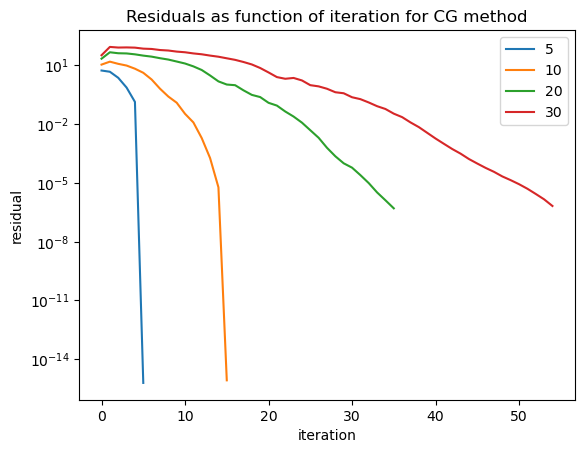

In [4]:
ns = [5,10,20,30]

for n in ns:
    A = poisson_matrix(n)
    b = np.ones(n**2)
    x0 = np.zeros(n**2)

    xopt, stat = cgm_method(A, b, x0)
    niter = stat['iter']

    print(f'n = {n}: iterations = {niter}')

    plt.semilogy(range(stat['iter']+1), stat['resd'])
    plt.title('Residuals as function of iteration for CG method')
    plt.xlabel('iteration')
    plt.ylabel('residual')
plt.legend(ns)
plt.show()

Convergence is almost 2n

In [5]:
for n in ns:
    A = poisson_matrix(n)
    print(f'n = {n}: Cond number = {np.linalg.cond(A)}')

n = 5: Cond number = 13.928203230275487
n = 10: Cond number = 48.37415007870828
n = 20: Cond number = 178.06427461085988
n = 30: Cond number = 388.8121344932613


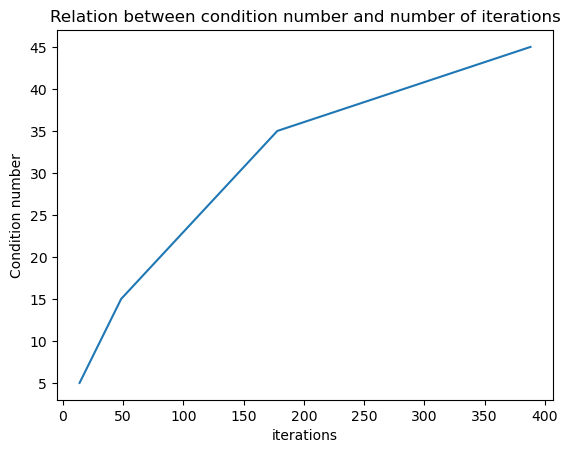

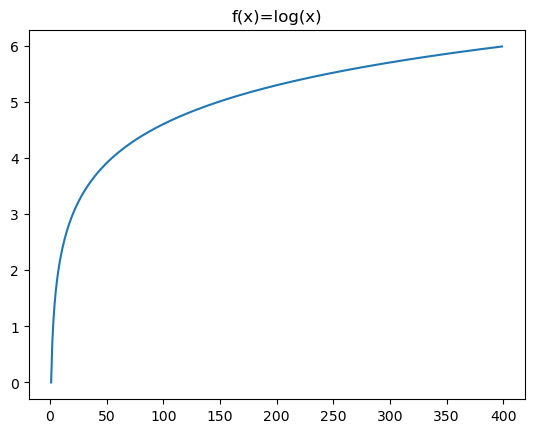

In [6]:
its = [5,15,35,45]
conds = [13.9,48.4,178,388]
plt.plot(conds,its)
plt.ylabel('Condition number')
plt.xlabel('iterations')
plt.title('Relation between condition number and number of iterations')
plt.show()

x = range(1,400)
y = np.log(x)
plt.plot(x,y)
plt.title('f(x)=log(x)')
plt.show()

It looks like the condition number depends logarithmicly

## Steepest descent

In [33]:
def fundfun(x):
    n = int(np.sqrt(len(x)))
    A = poisson_matrix(n)
    b = np.ones(n**2)
    f = 1/2 * np.dot(np.dot(x.T, A), x) - np.dot(b.T,x)
    df = np.dot(A,x) - b
    return f, df

In [36]:
n = 5
x0 = np.zeros(n**2)

xopt, stat = steepestdescent_line_method(fundfun, x0, tol=1.0e-6, rho=0.5, c=0.1)

n = 5: iterations = 42
n = 10: iterations = 102
n = 20: iterations = 683
n = 30: iterations = 2000


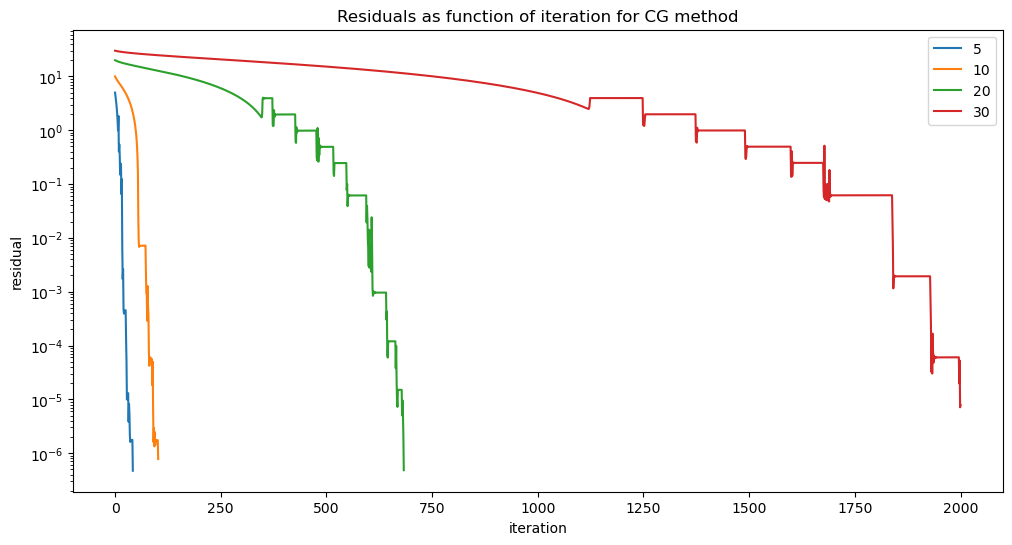

In [42]:
ns = [5,10,20,30]

plt.figure(figsize=(12,6))
for n in ns:
    x0 = np.zeros(n**2)

    xopt, stat = steepestdescent_line_method(fundfun, x0, tol=1.0e-6, rho=0.5, c=0.1)
    niter = stat['iter']

    print(f'n = {n}: iterations = {niter}')

    plt.semilogy(range(stat['iter']+1), stat['normdF'])
    plt.title('Residuals as function of iteration for CG method')
    plt.xlabel('iteration')
    plt.ylabel('residual')
plt.legend(ns)
plt.show()